In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display     import HTML
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 10]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [5]:
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

df = pd.read_csv(dataset_path)

In [6]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [7]:
df.index = pd.to_datetime(df['DATE'])

In [8]:
df = df.drop(columns='DATE')

In [9]:
df.head() 

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


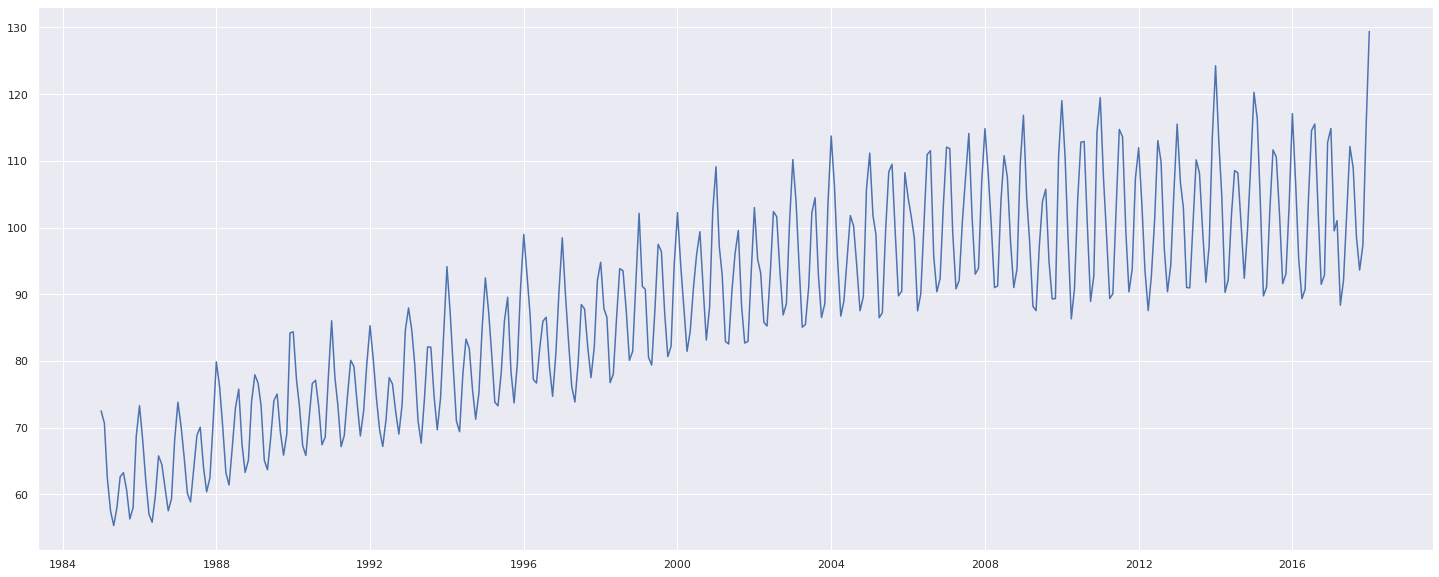

In [10]:
plt.plot(df.index, df.Value)

# Decomposicoa de Time Series

In [11]:
result = seasonal_decompose(df.Value)

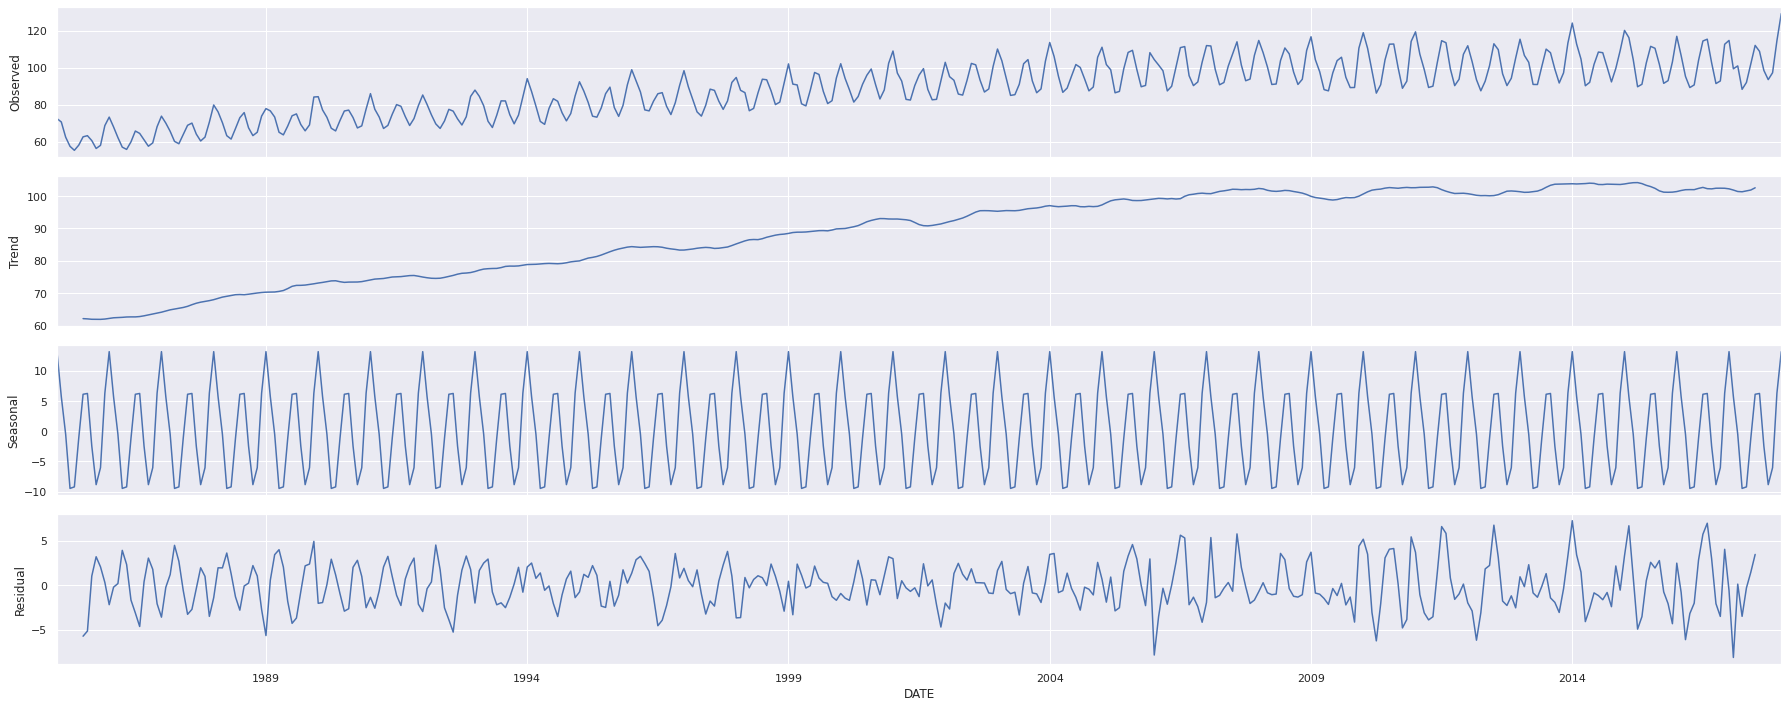

In [12]:
result.plot();

# Novo caso de Analise Exploratoria

In [13]:
path_2 = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"
df2 = pd.read_csv(path_2)

In [14]:
df2['Datetime'] = pd.to_datetime(df2.Datetime)

In [15]:
df2.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [16]:
 df2.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


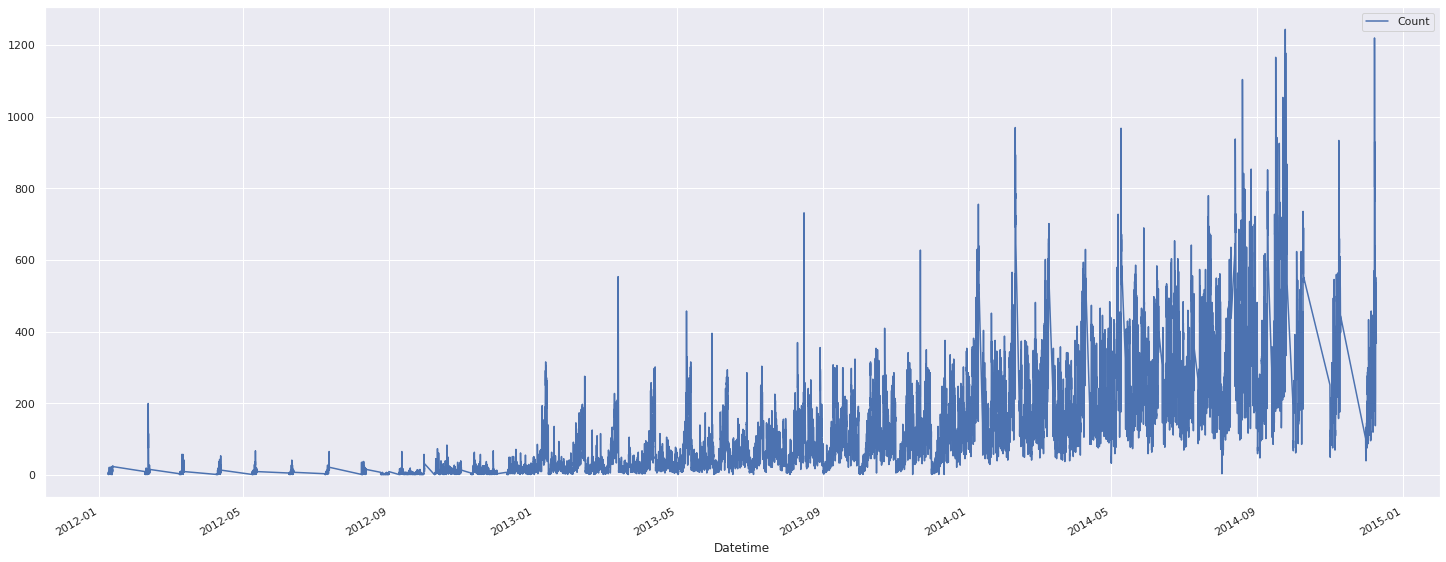

In [17]:
df2.plot(x = 'Datetime', y = 'Count' );

### Hipoteses

1.   Pessoas se moveimentam mais durante a semana
2.   Ha horarios de pico por causa de idas e vindas do trabalho
3.   Ha periodos no mes onde a demanda por transportes e' maior




### Criadno novas vairaveis de tempo

In [18]:
# Criado features de tempo
df2['year'] = df2.Datetime.dt.year

df2['month'] = df2.Datetime.dt.month

df2['day'] = df2.Datetime.dt.day

df2['hour'] = df2.Datetime.dt.hour

# criar day of week, sanendo que nosso dia comeca de 0 como segunda feira

df2['day_of_week'] = df2.Datetime.dt.dayofweek


In [19]:
df2.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


## Validando Hipoteses

1.   Pessoas se moveimentam mais durante a semana



In [20]:
# Se for final de semana, ou seja dia ==5 sabado ou dia ==6 domingo, weekend == 1

df2.loc[(df2['day_of_week'] == 5) | (df2['day_of_week'] == 6), 'weekend'] = 1

In [21]:
df2.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1.0
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1.0
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1.0
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1.0
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1.0


In [22]:
# verificar numero de final de semana vs semana laboral

df2.weekend.value_counts()

1.0    5232
Name: weekend, dtype: int64

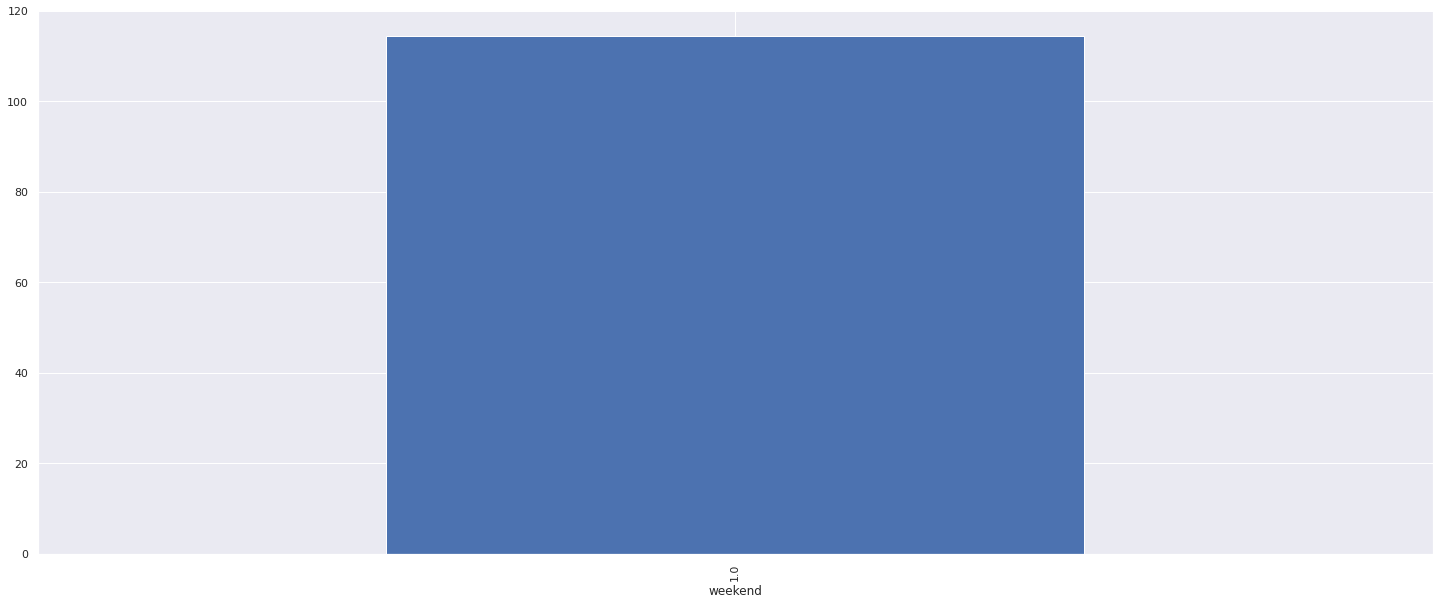

In [23]:
#  Agrupando final de semana e dia laboral

df2.groupby('weekend').Count.mean().plot.bar()

2.   Observar horarios de pico das 23 - - noite

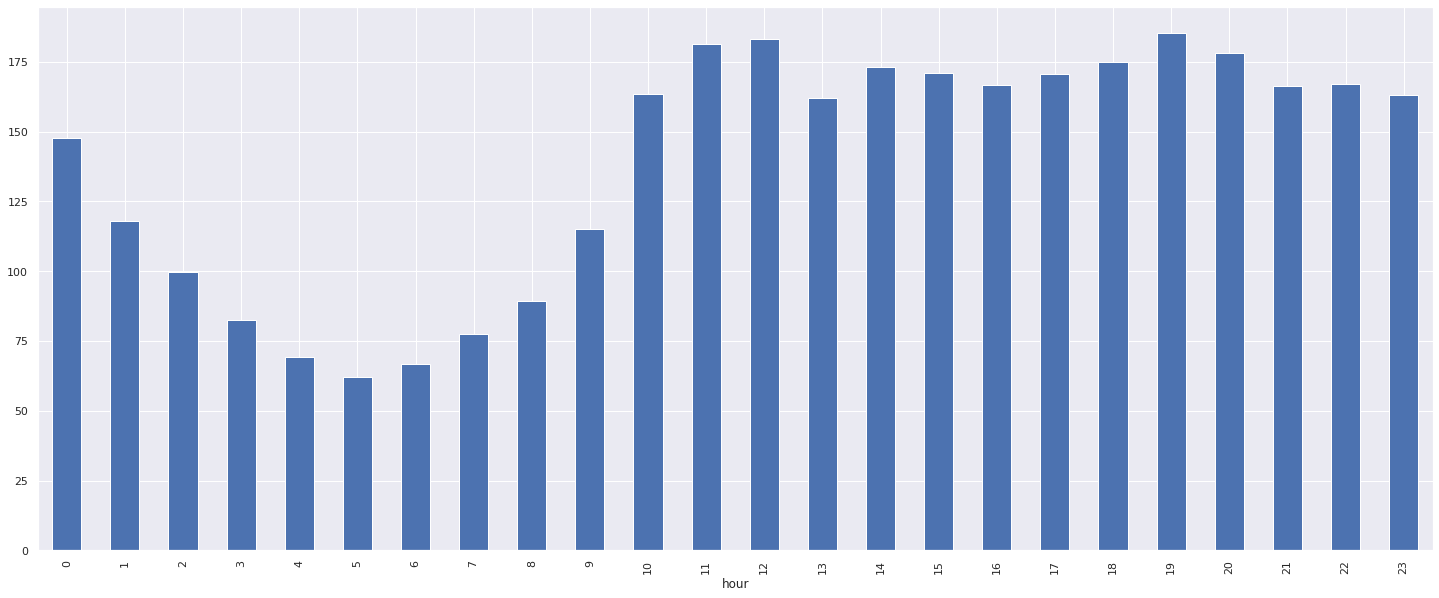

In [24]:
df2.groupby('hour').Count.mean().plot.bar()

3.   Observar periodos  de pico ao longo do ano de Mes 1(Jan) ate 12(Dez)

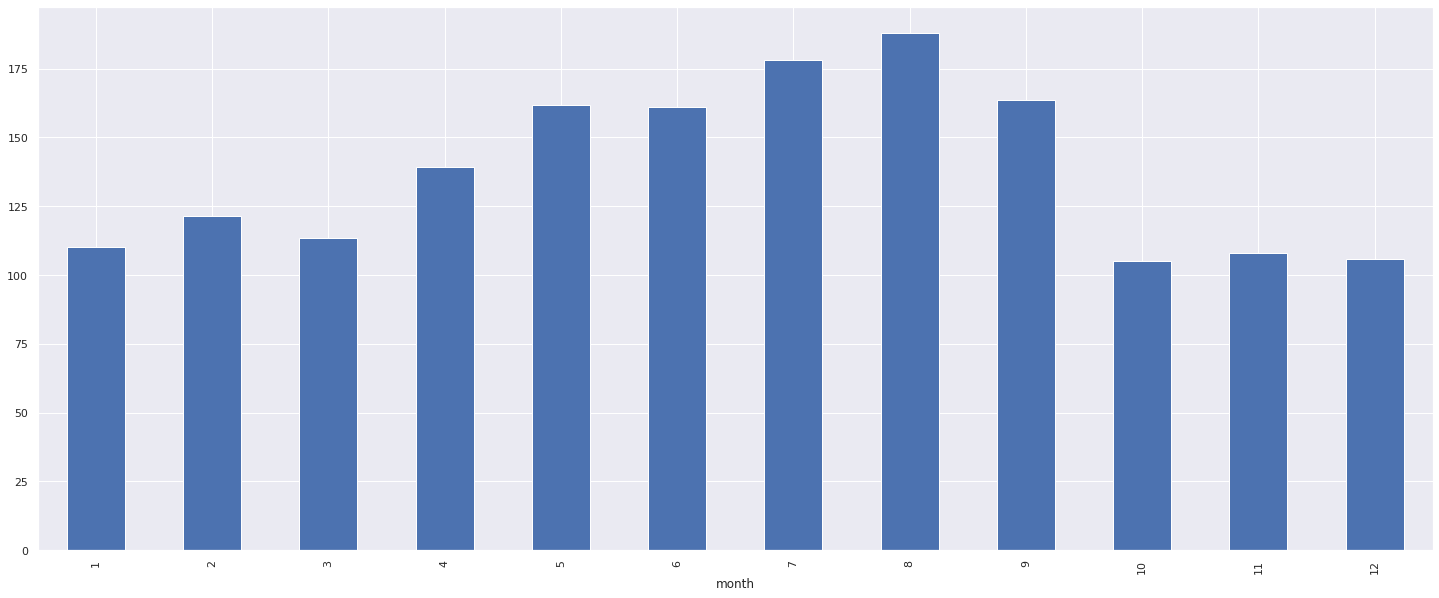

In [25]:
df2.groupby('month').Count.mean().plot.bar()

# Tecnicas de Time Series

### Train and test

In [26]:
train = df[df.index <= '2012-8-1']
valid = df[df.index > '2012-8-1']

In [27]:
# predicts
y_hat = valid.copy()

## Naive Aprouch (Baseline) 


In [30]:
# acessar ultimo valor
train.iloc[-1].values[0]

109.8601

In [31]:
# Adicionar uma coluna Naive nas predicoes
y_hat['naive'] = train.iloc[-1].values[0]

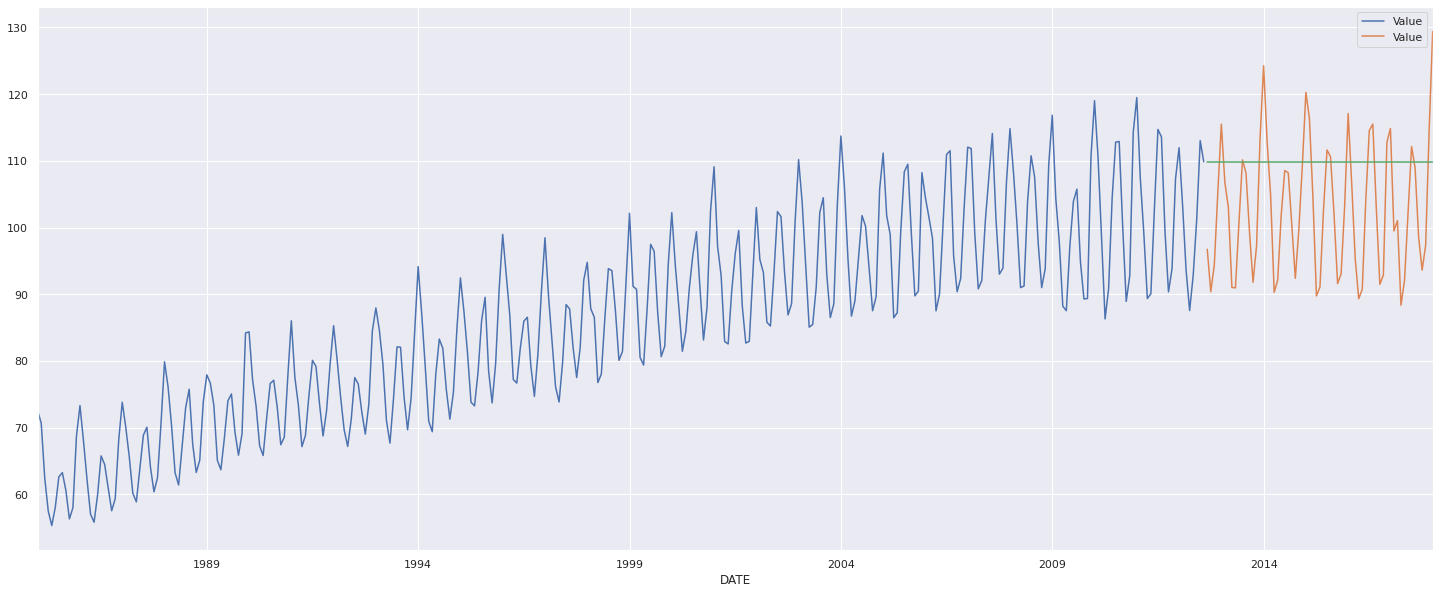

In [34]:
fig, ax = plt.subplots()
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['naive'].plot(ax=ax)

plt.show()

#### Calculo do erro

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
# mean_squared_error ao quadrado, true
print('Erro RMSE Naive Approuch:')
mean_squared_error(y_hat['Value'], y_hat['naive'], squared = True)

Erro Naive Aprouch:


144.1829082647693

# Media Movel Approuch(Baseline 2)

In [46]:
# metodo rolling diz o nr da janela, se for = 7 no nosso caso, ele calcula a de 7 dias por vir, baseando na media de 7 dias antes, mas os primeiros
# 7 dias nao tem valores, porque nao temos 7 dias antes deles
# pegamos a media de 7 ultimos dias, antes do ultimo valor da lista .iloc[-1], e guardamos essa previsao que sao dos proximos 7 dias
y_hat['media7'] = train.Value.rolling(7).mean().iloc[-1]

In [51]:
def plot_serie(coluna):
  fig, ax = plt.subplots()
  train.plot(ax=ax)
  valid.plot(ax=ax)
  coluna.plot(ax=ax)

  return plt.show()

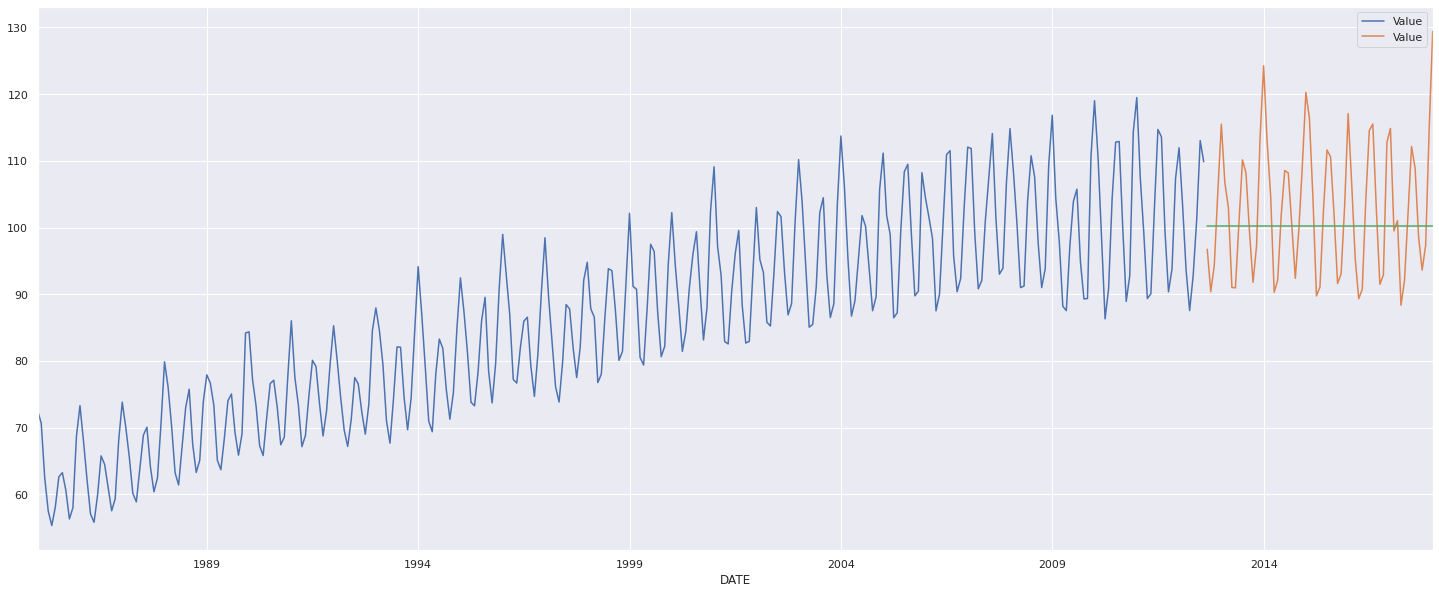

In [52]:
plot_serie(y_hat['media7'])

In [54]:
# mean_squared_error ao quadrado, true
print('Erro RMSE Media Movel Approuch:')
mean_squared_error(y_hat['Value'], y_hat['media7'], squared = True)

Erro Media Movel Approuch:


101.2125496049239

# Holts Linear Trends

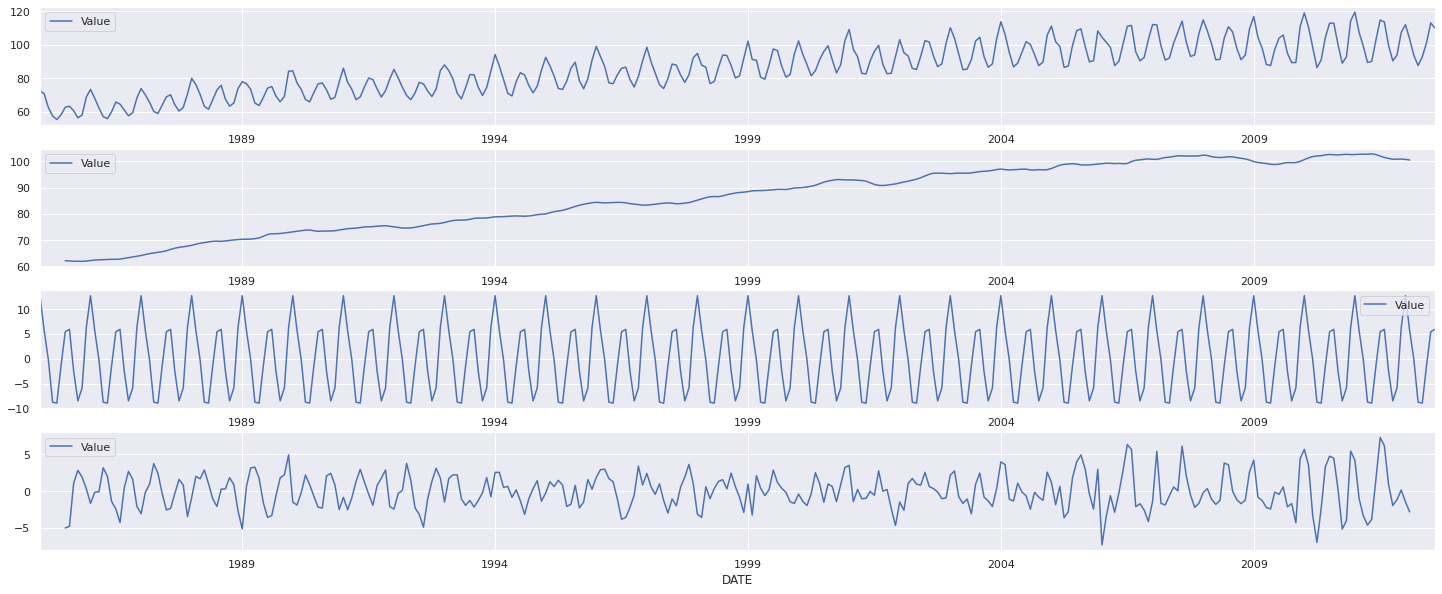

In [69]:
# ploting trends 
result = seasonal_decompose(train)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
result.observed.plot(ax= ax1)
result.trend.plot(ax= ax2)
result.seasonal.plot(ax= ax3)
result.resid.plot(ax= ax4)
plt.show()

## Appling Holts Linear Model

In [59]:
 from statsmodels.tsa.holtwinters import Holt

In [71]:
y_hat['holt'] = Holt(train.Value).fit(smoothing_level = 0.1,
                                       smoothing_slope = 0.1).forecast(len(valid)) # smoothing_slope e' a derivada da recta, ou a inclinacao


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


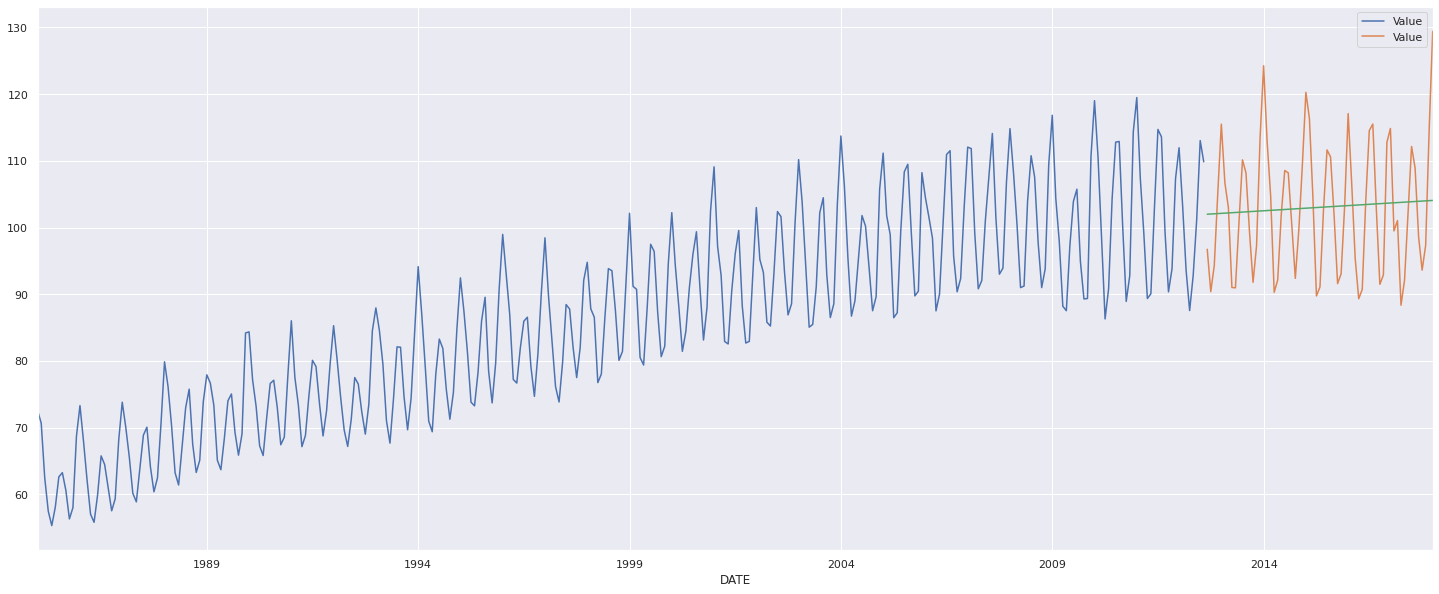

In [72]:
# ploting
plot_serie(y_hat['holt'])

In [74]:
# mean_squared_error ao quadrado, true
print('Erro RMSE Holt Approuch:')
mean_squared_error(y_hat['Value'], y_hat['holt'], squared = True)

Erro Holt Approuch:


93.79197449495115